<a href="https://colab.research.google.com/github/DKurysh/image_classifier/blob/master/cl_RN50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import os

NUM_CLASSES = 3
# Fixed for color images
CHANNELS = 3

IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'
LOSS_METRICS = ['accuracy']

NUM_EPOCHS = 30

BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

resnet50_imagenet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMAGE_RESIZE,IMAGE_RESIZE, CHANNELS))

conv1 = Conv2D(32, 2, activation = 'relu')(resnet50_imagenet_model.output)
conv2 = Conv2D(64, 2, activation = 'relu')(conv1)
pool2 = MaxPooling2D(2,2)(conv2)
bn2 = BatchNormalization(axis=CHANNELS)(pool2)
drop1 = Dropout(0.2)(bn2)
#Flatten output layer
flattened = Flatten()(drop1)
#Fully connected layer 1
fc1 = Dense(128, activation='relu')(flattened)
#Fully connected layer, output layer
fc2 = Dense(3, activation = DENSE_LAYER_ACTIVATION)(fc1)

model = Model(inputs=resnet50_imagenet_model.input, outputs=fc2)

from tensorflow.keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

# preprocessing_function is applied on each image but only after re-sizing & augmentation (resize => augment => pre-process)
# Each of the keras.application.resnet* preprocess_input MOSTLY mean BATCH NORMALIZATION (applied on each batch) stabilize the inputs to nonlinear activation functions
# Batch Normalization helps in faster convergence

from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
PATH = '/content/gdrive/My Drive/test_job'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 

history = model.fit(
        train_generator,
        steps_per_epoch=1200/BATCH_SIZE_TRAINING ,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=300/BATCH_SIZE_VALIDATION
)

Mounted at /content/gdrive
Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/30
12/12 [==============================] - 26s 2s/step - loss: 0.7621 - accuracy: 0.6733 - val_loss: 4.4956 - val_accuracy: 0.5767
Epoch 2/30
12/12 [==============================] - 25s 2s/step - loss: 0.1298 - accuracy: 0.9567 - val_loss: 6.2477 - val_accuracy: 0.6033
Epoch 3/30
12/12 [==============================] - 25s 2s/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 3.6203 - val_accuracy: 0.6833
Epoch 4/30
12/12 [==============================] - 25s 2s/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 3.7330 - val_accuracy: 0.7267
Epoch 5/30
12/12 [==============================] - 25s 2s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.2778 - val_accuracy: 0.7700
Epoch 6/30
12/12 [==============================] - 25s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.6417 - val_accuracy: 0.7833
Epoch 7/30
12/12 [==============================] 

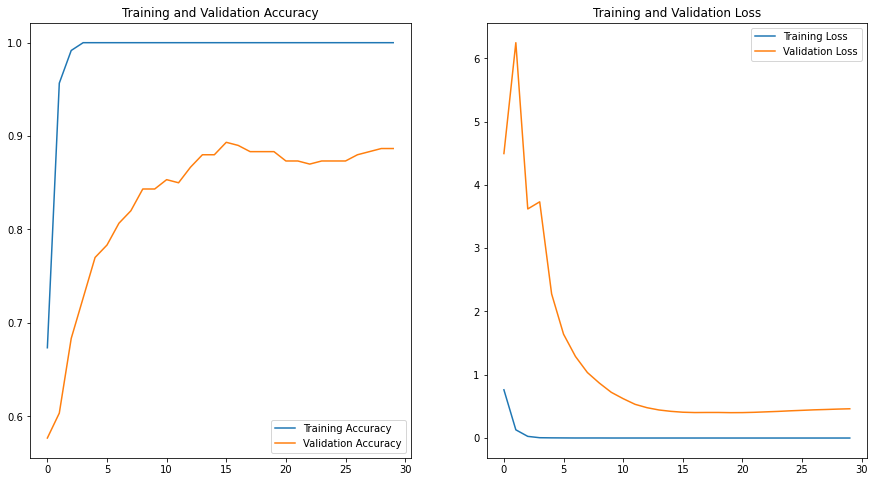

In [4]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()